In [23]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt 
from trng import LightRandom

In [24]:
# lrng = LightRandom()

# n_samples = 1000
# data_rand = lrng.randint(low=0, high=100, size=1000)
# DATA = pd.DataFrame(data_rand, columns=["rand"])
# DATA.to_csv("Collected_1000_For_TSP_int.csv", index=False)
# DATA

In [25]:
num_rand = pd.read_csv("Collected_1000_For_TSP_int.csv")
num_rand = num_rand.to_numpy().reshape(1000)
len(num_rand)

1000

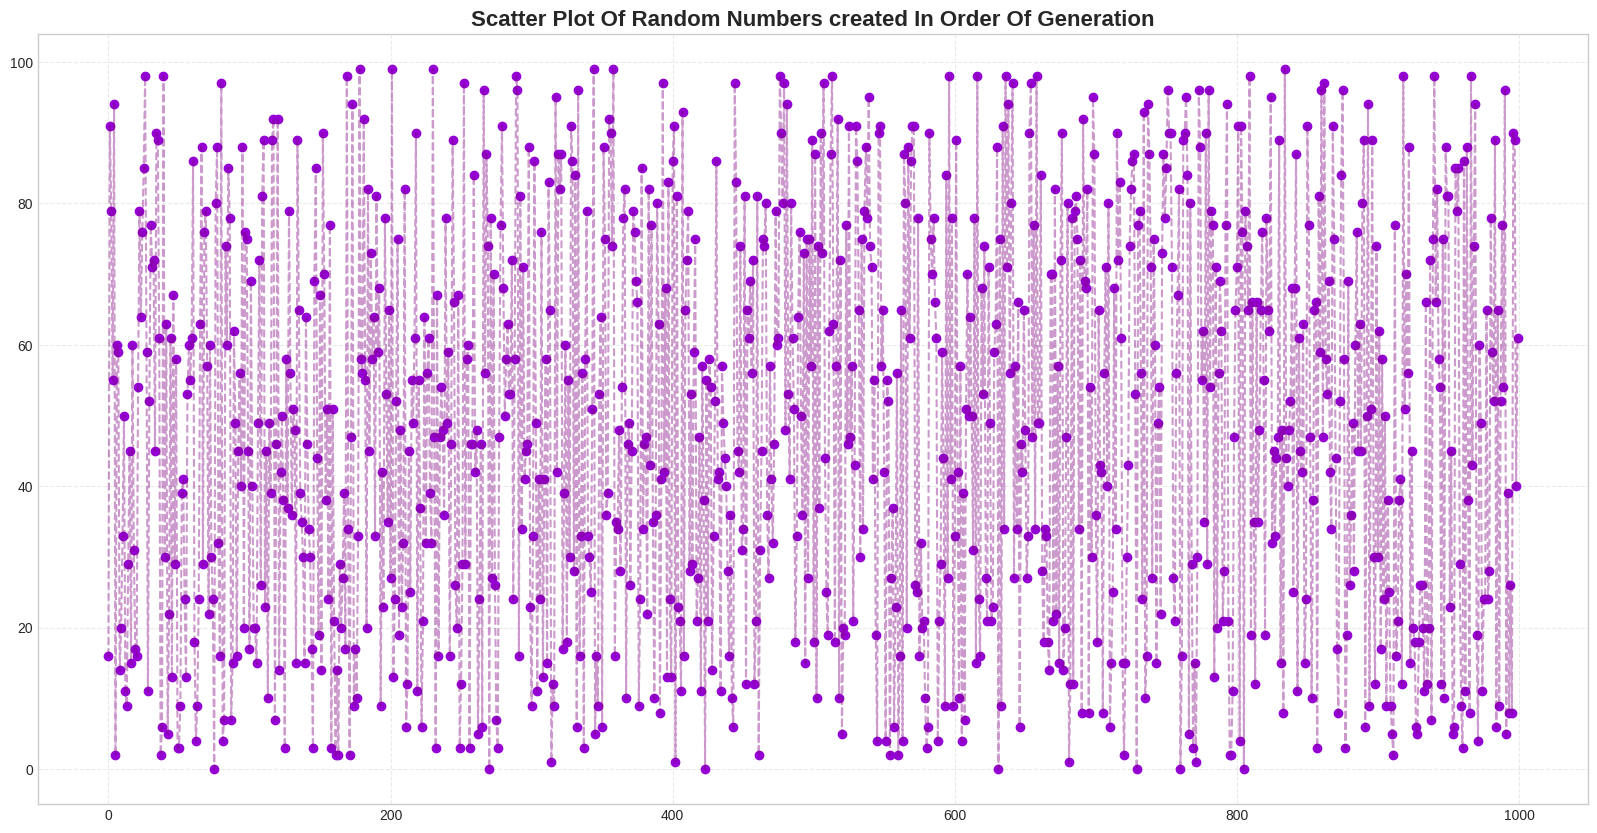

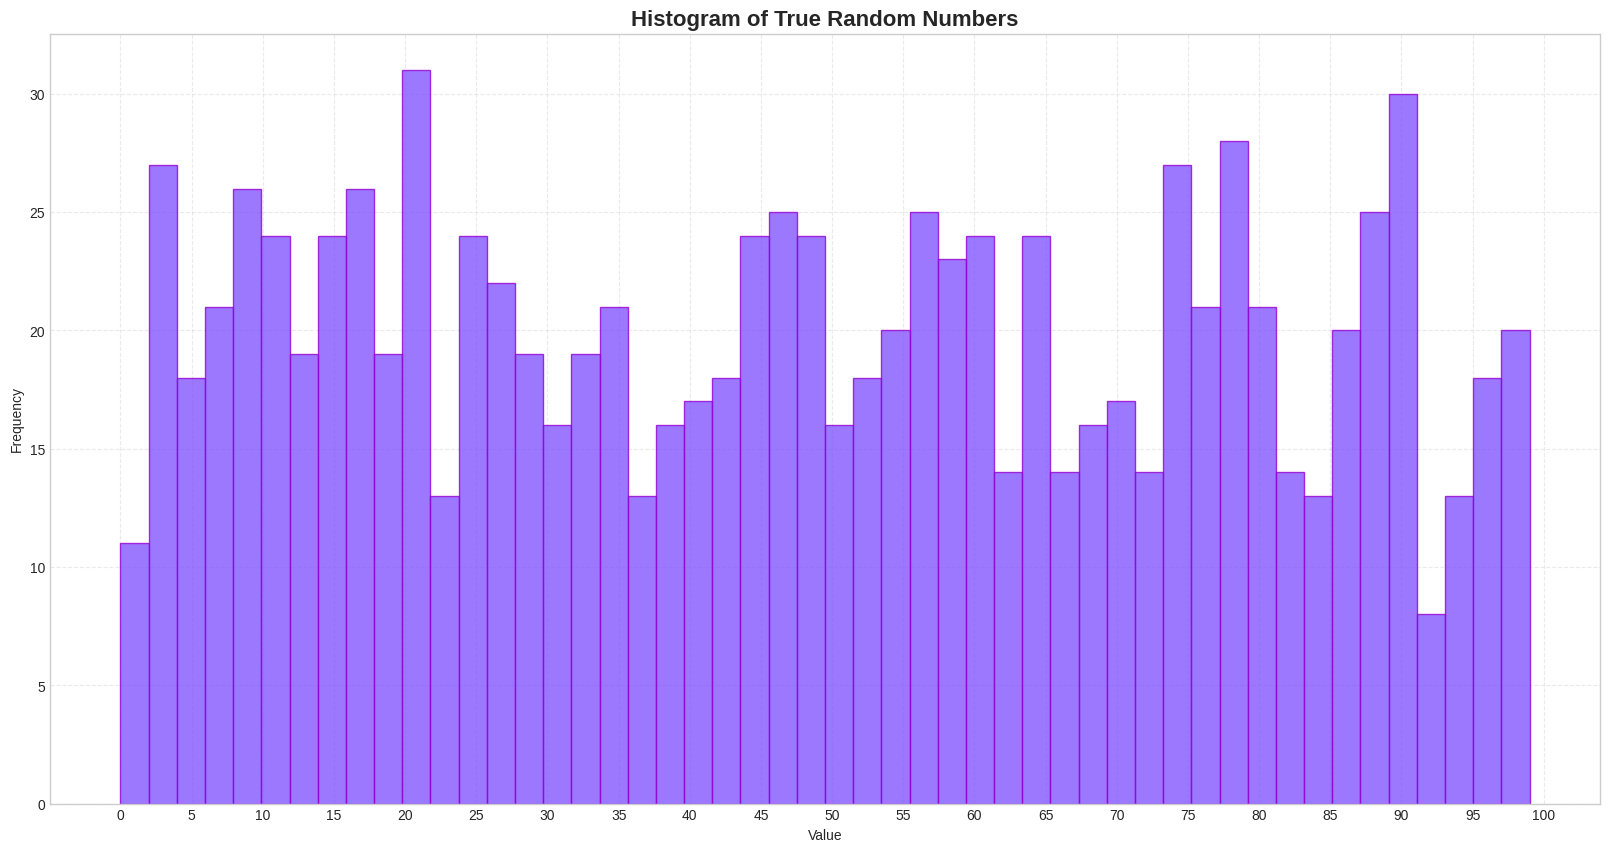

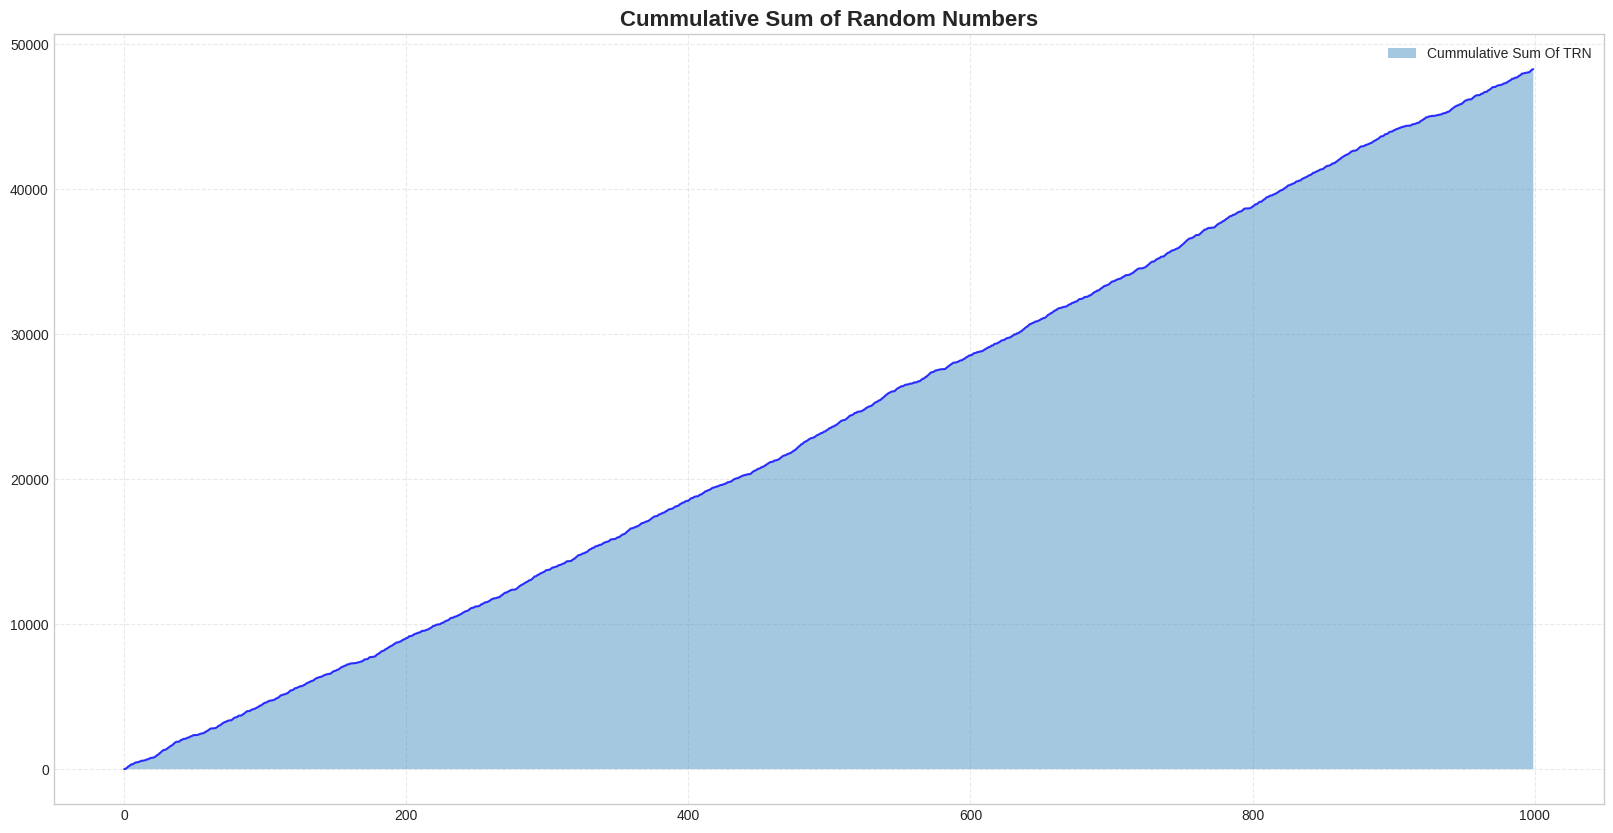

In [26]:
plt.style.use("seaborn-v0_8-whitegrid")
dpi = 100
plt.figure(figsize=(20, 10), dpi=dpi)
plt.plot(num_rand, color="purple", linestyle="--", alpha=0.4)
plt.scatter(range(len(num_rand)), num_rand, label="Scatter Plot Of Random Numbers", color="darkviolet")
plt.title("Scatter Plot Of Random Numbers created In Order Of Generation", weight="bold", fontsize=16)
plt.grid(linestyle="--", alpha=0.4)
plt.show()

dpi = 100
plt.figure(figsize=(20, 10), dpi=dpi)
plt.hist(num_rand, bins=50, alpha=0.8, color="#8356ff", edgecolor='darkviolet')
plt.title("Histogram of True Random Numbers", weight="bold", fontsize=16)
plt.xticks(np.arange(0, 101, 5), rotation=0)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(linestyle="--", alpha=0.4)
plt.show()

cummulative_sum = [np.sum(num_rand[:x]) for x in range(len(num_rand))]

dpi = 100
plt.figure(figsize=(20, 10), dpi=dpi)
plt.plot(cummulative_sum, color="blue", alpha=0.8)
plt.fill_between(range(len(num_rand)), cummulative_sum, label="Cummulative Sum Of TRN", alpha=0.4)
plt.title("Cummulative Sum of Random Numbers", weight="bold", fontsize=16)
plt.legend()
plt.grid(linestyle="--", alpha=0.4)
plt.show()

In [27]:
import numpy as np
import pandas as pd
from scipy.stats import chisquare, entropy, kstest
from statsmodels.sandbox.stats.runs import runstest_1samp
from collections import Counter

# Example input
rand_ints = num_rand
def stats_test(rand_ints):
    
    print("🔍 Statistical Randomness Analysis for Integer Random Numbers")
    print("="*60)

    # 1. Chi-Square Test for Uniformity
    bins = np.arange(rand_ints.min(), rand_ints.max() + 2)  # one bin per integer
    counts, _ = np.histogram(rand_ints, bins=bins)
    chi_stat, chi_p = chisquare(counts)
    print(f"✅ Chi-Square Uniformity Test: p-value = {chi_p:.4f}")

    # 2. Runs Test (above/below median)
    median = np.median(rand_ints)
    binary = rand_ints > median
    runs_z, runs_p = runstest_1samp(binary)
    print(f"✅ Runs Test (above/below median): p-value = {runs_p:.4f}")

    # 3. Lag-1 Autocorrelation
    autocorr = pd.Series(rand_ints).autocorr(lag=1)
    print(f"✅ Lag-1 Autocorrelation: {autocorr:.4f}")

    # 4. Shannon Entropy
    unique_vals, unique_counts = np.unique(rand_ints, return_counts=True)
    probs = unique_counts / unique_counts.sum()
    shannon_entropy = entropy(probs, base=2)
    max_entropy = np.log2(len(unique_vals))
    print(f"✅ Shannon Entropy: {shannon_entropy:.4f} bits (Max possible: {max_entropy:.4f})")

    # 5. Gaps Test: check for missing values
    value_range = set(range(rand_ints.min(), rand_ints.max() + 1))
    missing_vals = sorted(value_range - set(rand_ints))
    print(f"✅ Gaps Test: {len(missing_vals)} missing values out of {len(value_range)}")
    if len(missing_vals) <= 5:
        print("   ➤ Missing values:", missing_vals)

    # 6. Difference Test
    diffs = np.diff(rand_ints)
    print(f"✅ Differences Between Successive Values: Mean = {np.mean(diffs):.4f}, Std = {np.std(diffs):.4f}")

    # 7. Pair Frequency (2-gram analysis)
    pairs = list(zip(rand_ints[:-1], rand_ints[1:]))
    pair_freq = Counter(pairs)
    most_common_pairs = pair_freq.most_common(5)
    print("✅ Top 5 most frequent 2-value pairs:")
    for pair, count in most_common_pairs:
        print(f"   ➤ Pair {pair} occurred {count} times")

    print("="*60)

stats_test(rand_ints)

🔍 Statistical Randomness Analysis for Integer Random Numbers
✅ Chi-Square Uniformity Test: p-value = 0.0218
✅ Runs Test (above/below median): p-value = 0.7526
✅ Lag-1 Autocorrelation: 0.0127
✅ Shannon Entropy: 6.5477 bits (Max possible: 6.6439)
✅ Gaps Test: 0 missing values out of 100
   ➤ Missing values: []
✅ Differences Between Successive Values: Mean = 0.0450, Std = 40.4135
✅ Top 5 most frequent 2-value pairs:
   ➤ Pair (14, 20) occurred 2 times
   ➤ Pair (54, 79) occurred 2 times
   ➤ Pair (64, 76) occurred 2 times
   ➤ Pair (52, 77) occurred 2 times
   ➤ Pair (90, 89) occurred 2 times


In [28]:
import numpy as np

def xor_mix(trn_array, epoch, max_val):
    
    trn_array = np.asarray(trn_array, dtype=np.uint32)
    seed = (epoch * 73856093) ^ 0xA5A5A5A5
    rng = np.random.default_rng(seed)
    mask = rng.integers(0, np.iinfo(np.uint32).max, size=trn_array.shape, dtype=np.uint32)
    mixed_array = np.bitwise_xor(trn_array, mask) % (max_val + 1)

    return mixed_array.astype(int)


In [29]:
num_rand

array([16, 91, 79, 55, 94,  2, 60, 59, 14, 20, 33, 50, 11,  9, 29, 45, 15,
       60, 31, 17, 16, 54, 79, 64, 76, 85, 98, 59, 11, 52, 77, 71, 72, 45,
       90, 89, 61,  2,  6, 98, 30, 63,  5, 22, 61, 13, 67, 29, 58,  3,  3,
        9, 39, 41, 24, 13, 53, 60, 55, 61, 86, 18,  4,  9, 24, 63, 88, 29,
       76, 79, 57, 22, 60, 30, 24,  0, 80, 88, 32, 16, 97,  4,  7, 74, 60,
       85, 78,  7, 15, 62, 49, 16, 45, 56, 40, 88, 20, 76, 75, 45, 17, 69,
       40, 20, 20, 15, 49, 72, 26, 81, 89, 23, 45, 10, 49, 39, 89, 92,  7,
       46, 92, 14, 42, 50, 38,  3, 58, 37, 79, 56, 36, 51, 48, 15, 89, 65,
       39, 35, 30, 15, 64, 46, 34, 30, 17,  3, 69, 85, 44, 19, 67, 14, 90,
       70, 38, 51, 24, 77,  3, 51, 21,  2, 14,  2, 29, 20, 27, 39, 17, 98,
       34,  2, 47, 94,  9, 17, 10, 33, 99, 58, 56, 92, 55, 20, 82, 45, 73,
       58, 64, 33, 81, 59, 68,  9, 42, 23, 78, 53, 35, 65, 27, 99, 13, 24,
       52, 75, 19, 48, 23, 32, 82,  6, 12, 45, 25, 55, 49, 61, 90, 11, 55,
       37,  6, 21, 64, 32

In [30]:
new_rng = xor_mix(num_rand, 200, num_rand.max())
new_rng

array([59, 40, 58, 70, 50, 87,  0, 34, 28, 30, 11, 69, 89, 41, 70, 48, 76,
       72, 72, 32, 45, 12, 66, 16, 75, 87, 40,  2, 84, 33, 44, 73, 52, 56,
       89, 42, 89, 27, 78, 28, 80, 65, 64, 67, 89, 82, 32, 78, 96, 61, 71,
       75, 69, 25, 94, 62, 62,  1, 95, 44, 91, 63, 71, 58, 55, 33, 68, 71,
       41, 91, 56, 77, 34, 50, 76, 51, 94, 78,  8, 99, 69, 69, 59, 57,  8,
       72, 57, 77, 34, 64, 28, 46, 99, 71, 25, 31, 62, 60,  7, 54, 95, 18,
       69, 53, 28, 25, 32, 43, 51, 31, 63, 18, 88, 75, 53, 17, 74, 81, 71,
       24, 10, 85, 27, 72,  5, 28, 65, 51, 25, 10, 98, 95, 83, 76, 50, 61,
       69, 78,  0,  1, 74, 71,  4,  4, 61, 97,  5, 26, 46,  4, 59,  6, 81,
       21, 24, 93, 42, 10, 32, 79, 97, 27, 25, 87, 49, 54, 37, 38, 81, 29,
       93, 15, 95, 67, 94, 45, 13, 29, 45,  4, 17, 17, 68, 73,  4, 48, 13,
       48,  0, 66, 88,  7, 59, 69,  7,  9, 93, 90, 84, 95, 46, 71, 46, 14,
       59, 51, 56, 89,  7, 86, 75, 32, 95, 46,  9, 58, 49, 72, 87, 51, 58,
       66, 47, 65, 18, 27

In [31]:
stats_test(new_rng)

🔍 Statistical Randomness Analysis for Integer Random Numbers
✅ Chi-Square Uniformity Test: p-value = 0.5152
✅ Runs Test (above/below median): p-value = 0.7033
✅ Lag-1 Autocorrelation: 0.0065
✅ Shannon Entropy: 6.5748 bits (Max possible: 6.6439)
✅ Gaps Test: 0 missing values out of 100
   ➤ Missing values: []
✅ Differences Between Successive Values: Mean = 0.0220, Std = 39.7663
✅ Top 5 most frequent 2-value pairs:
   ➤ Pair (79, 33) occurred 3 times
   ➤ Pair (45, 12) occurred 2 times
   ➤ Pair (56, 89) occurred 2 times
   ➤ Pair (94, 62) occurred 2 times
   ➤ Pair (95, 44) occurred 2 times


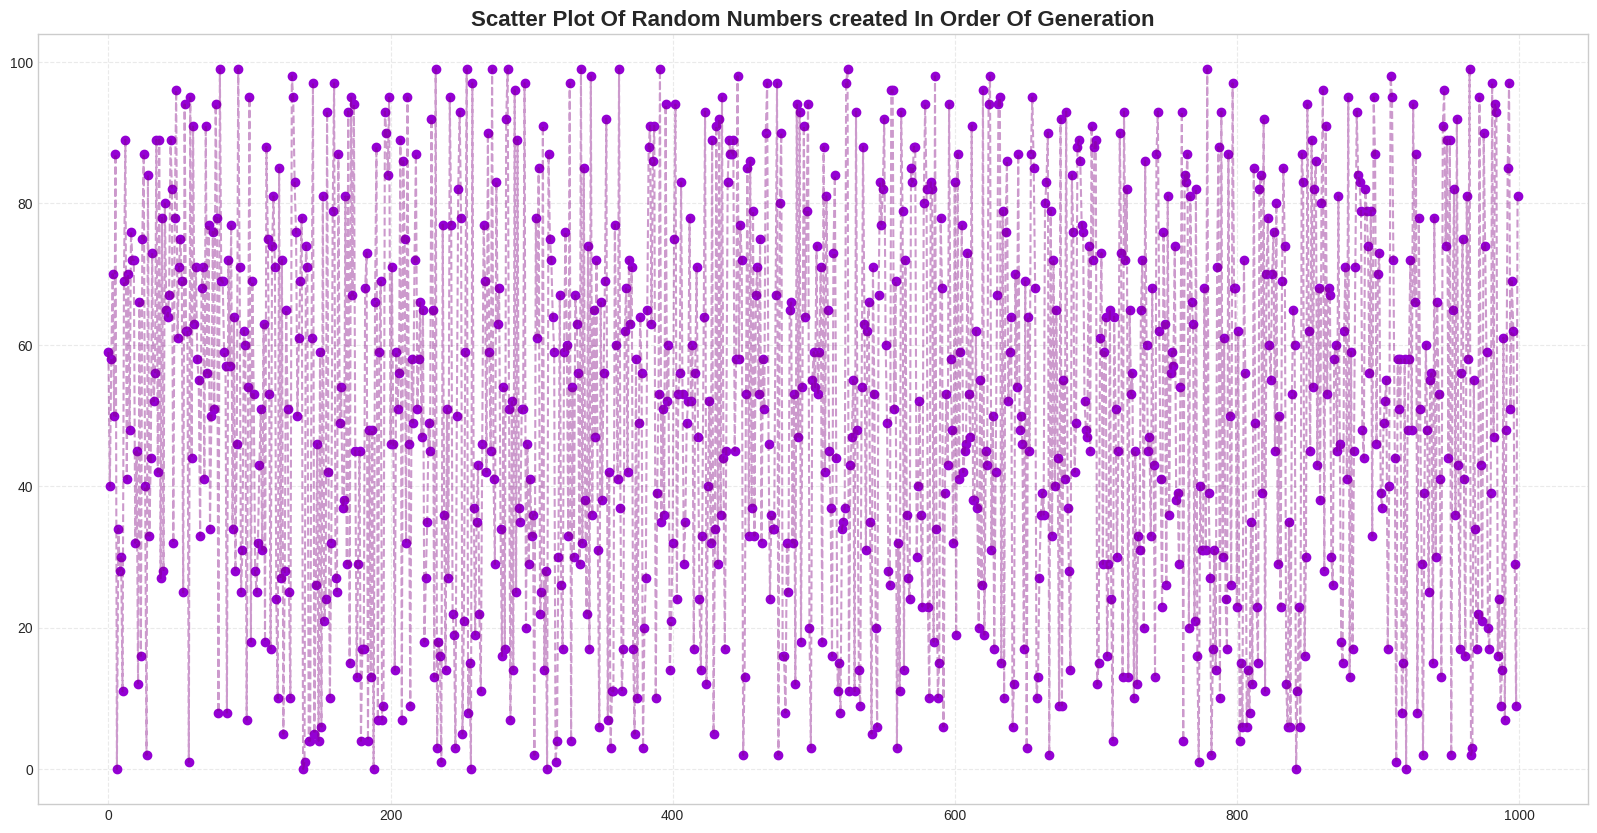

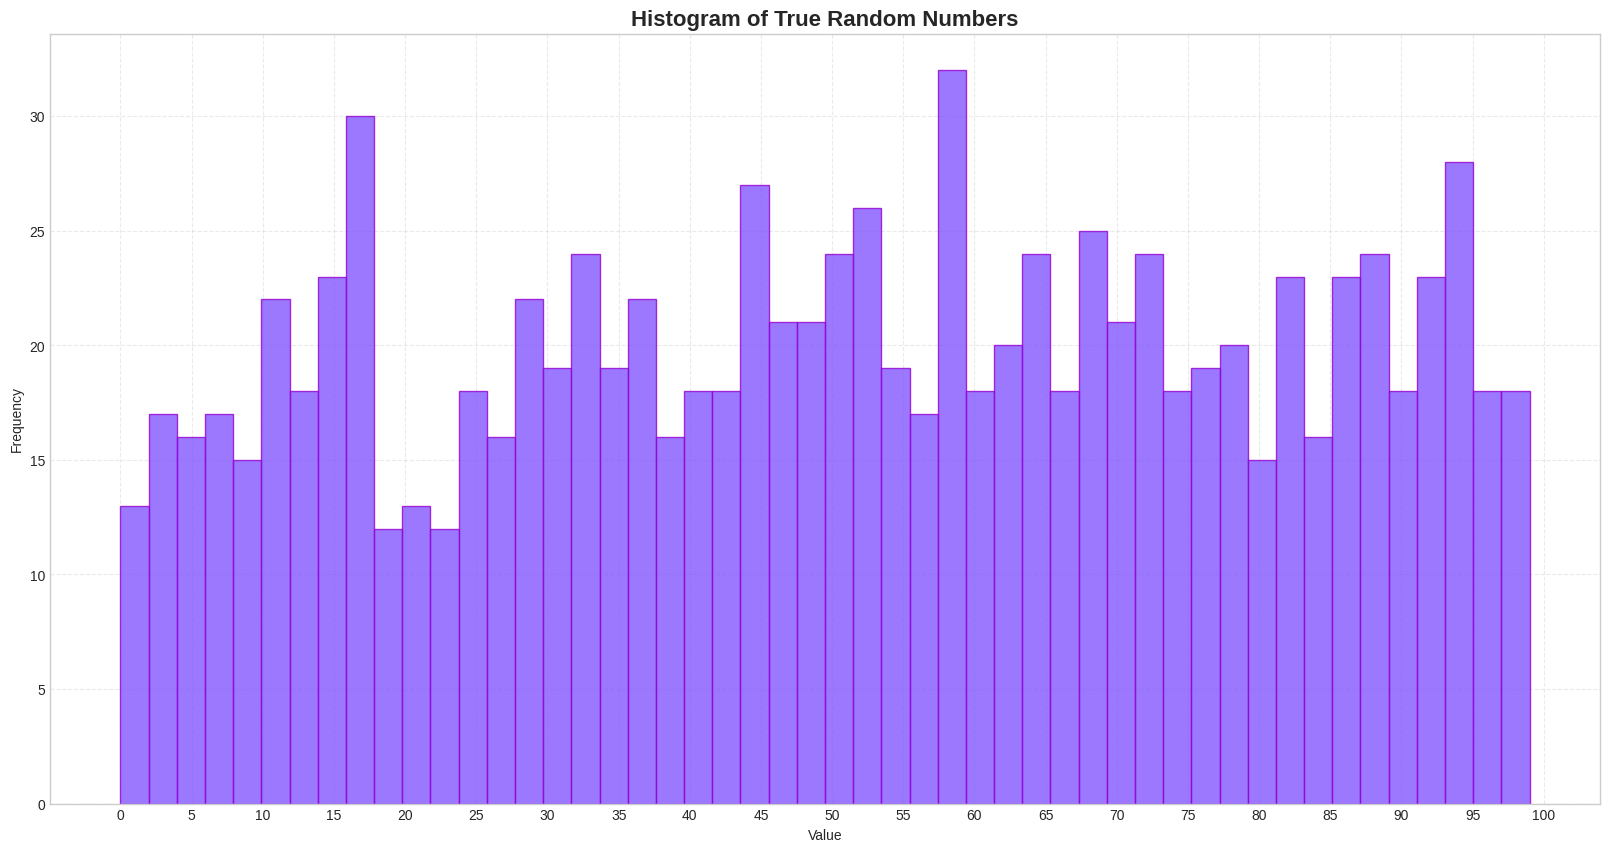

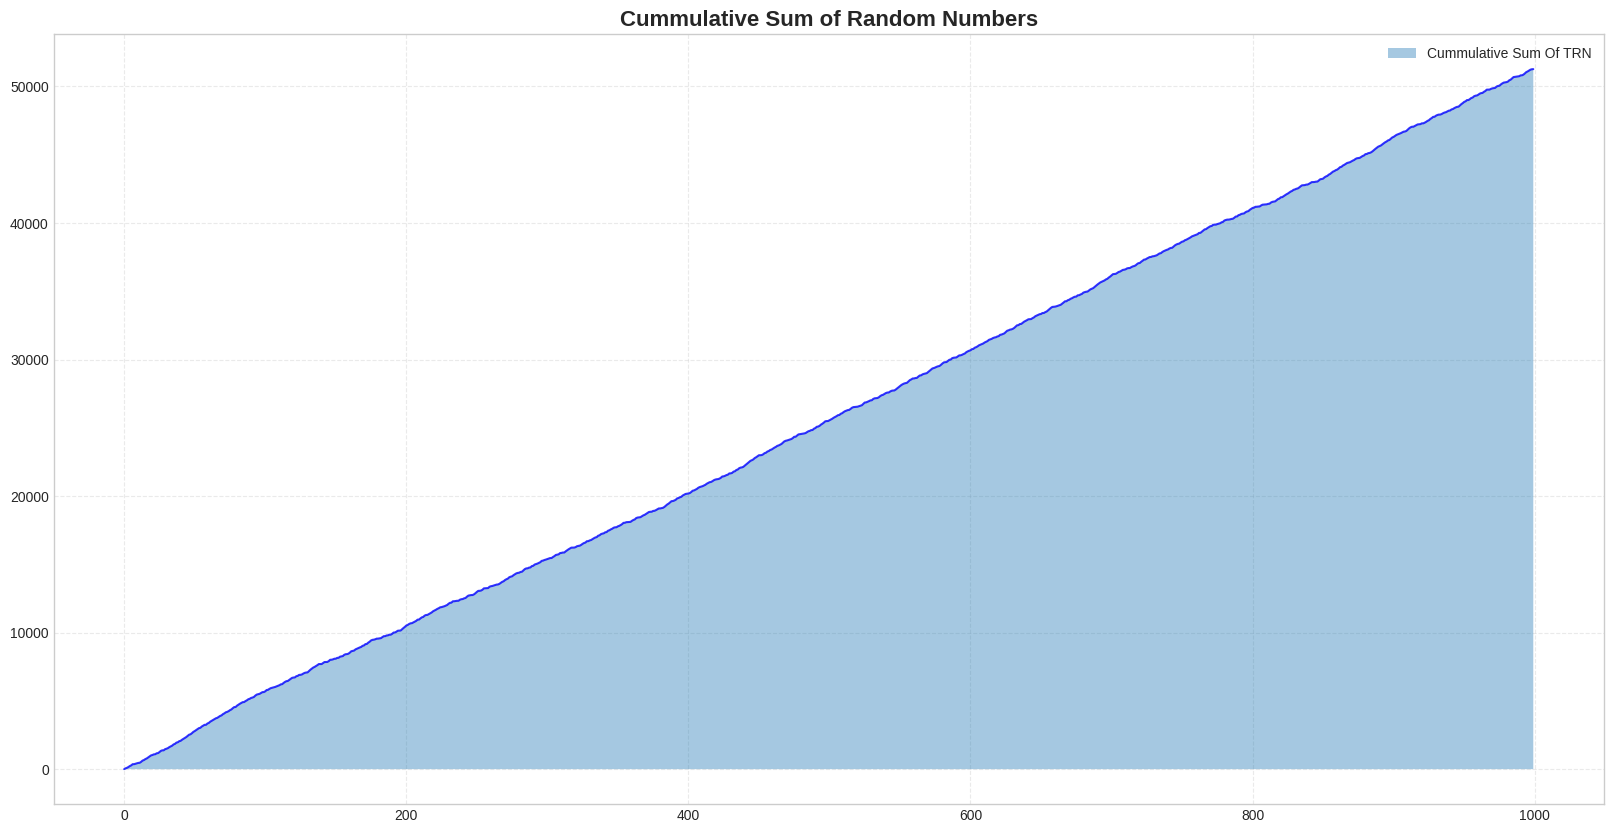

In [32]:
num_rand = new_rng

plt.style.use("seaborn-v0_8-whitegrid")
dpi = 100
plt.figure(figsize=(20, 10), dpi=dpi)
plt.plot(num_rand, color="purple", linestyle="--", alpha=0.4)
plt.scatter(range(len(num_rand)), num_rand, label="Scatter Plot Of Random Numbers", color="darkviolet")
plt.title("Scatter Plot Of Random Numbers created In Order Of Generation", weight="bold", fontsize=16)
plt.grid(linestyle="--", alpha=0.4)
plt.show()

dpi = 100
plt.figure(figsize=(20, 10), dpi=dpi)
plt.hist(num_rand, bins=50, alpha=0.8, color="#8356ff", edgecolor='darkviolet')
plt.title("Histogram of True Random Numbers", weight="bold", fontsize=16)
plt.xticks(np.arange(0, 101, 5), rotation=0)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(linestyle="--", alpha=0.4)
plt.show()

cummulative_sum = [np.sum(num_rand[:x]) for x in range(len(num_rand))]

dpi = 100
plt.figure(figsize=(20, 10), dpi=dpi)
plt.plot(cummulative_sum, color="blue", alpha=0.8)
plt.fill_between(range(len(num_rand)), cummulative_sum, label="Cummulative Sum Of TRN", alpha=0.4)
plt.title("Cummulative Sum of Random Numbers", weight="bold", fontsize=16)
plt.legend()
plt.grid(linestyle="--", alpha=0.4)
plt.show()